# aSPEM Experiment :defining a protocol




In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from  aSPEM import aSPEM
import time
timeStr = time.strftime("%Y-%m-%d_%H%M%S", time.localtime())
e = aSPEM(mode='pari', timeStr=timeStr)

In [2]:
import glob
import pickle
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

In [3]:
print(e.print_protocol())

TODO


In [4]:
t_titre = 35
t_label = 25 
fig_width = 15

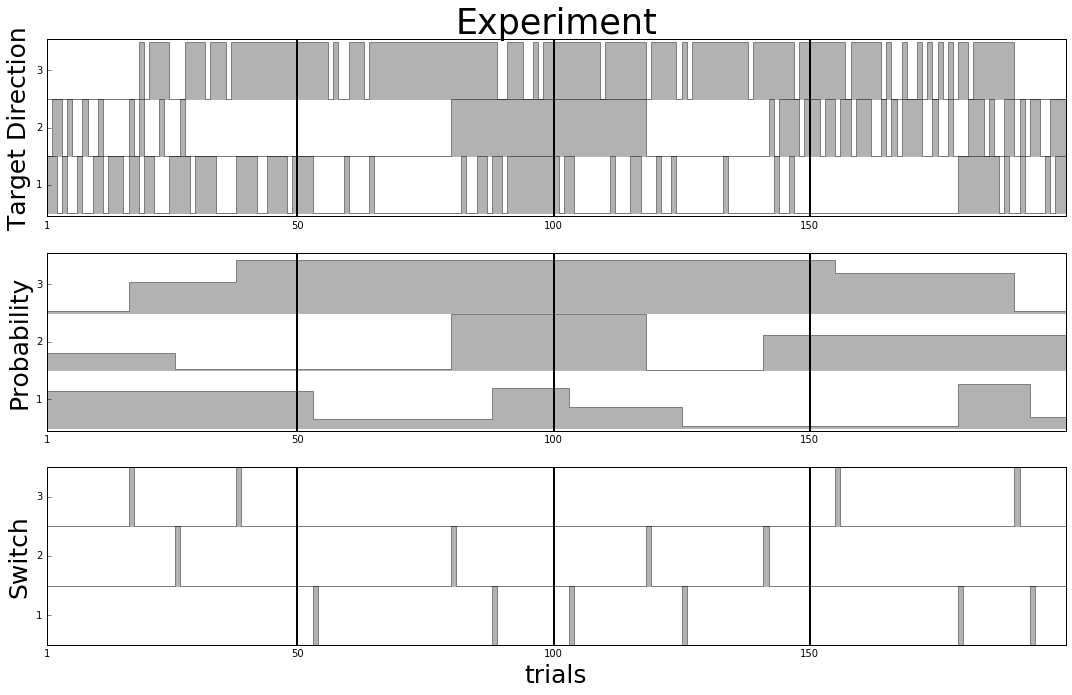

In [5]:
fig, axs, p = e.plot(fig_width=fig_width, t_titre=t_titre, t_label=t_label)

In [6]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [7]:
EXP = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in  ['AM','BMC','CS','DC','FM', 'IP', 'LB', 'OP', 'RS', 'TN']  :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            EXP.append(b)
PARAM = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in  ['AM','BMC','CS','DC','FM', 'IP', 'LB', 'OP', 'RS', 'TN']  :
        a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            PARAM.append(b)

sujet = IP


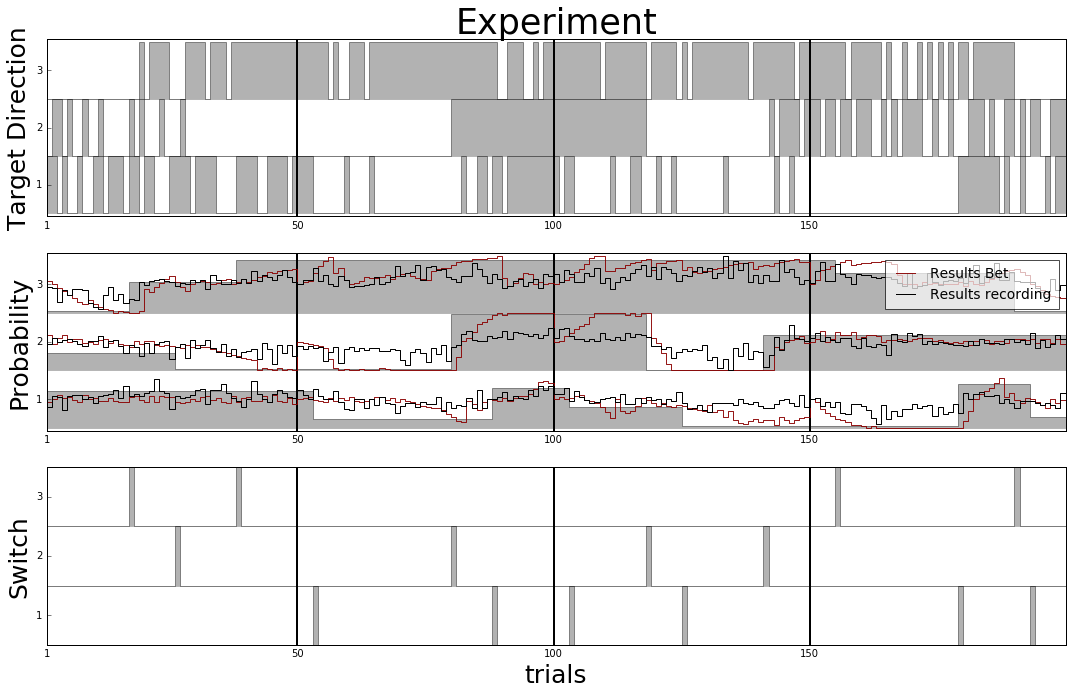

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/(1.6180)))
sujet = 4
print('sujet =', EXP[sujet]['observer'])
N_trials = EXP[sujet]['N_trials']
N_blocks = EXP[sujet]['N_blocks']
p = EXP[sujet]['p']
results = (EXP[sujet]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
v_anti = PARAM[sujet]['v_anti']

stick = np.zeros_like(p)
stick[:, :, 0] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
stick[:, :, 1] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]
stick[:, :, 2] = np.ones((N_trials, 1)) * np.arange(N_blocks)[np.newaxis, :]


for i_layer, label in enumerate(['Target Direction', 'Probability', 'Switch']): #([r'$\^x_0$', r'$\^p$', r'$\^x_2$']):
    axs[i_layer].step(range(N_trials), p[:, :, i_layer]+stick[:, :, i_layer], lw=1, c='k', alpha=.3)
    for i_block in range(N_blocks):
        axs[i_layer].fill_between(range(N_trials), i_block + np.zeros_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.3, facecolor='k', step='pre')
        #_ = axs[i_layer].fill_between(range(N_trials), i_block + np.ones_like(p[:, i_block, i_layer]), i_block + p[:, i_block, i_layer], lw=.5, alpha=.1, facecolor='red', step='pre')
    axs[i_layer].axis('tight')
    axs[i_layer].set_yticks(np.arange(N_blocks)+.5)
    axs[i_layer].set_yticklabels(np.arange(N_blocks)+1)
    axs[i_layer].set_xticks([0, 49, 99,149])
    axs[i_layer].set_xticklabels([1, 50, 100, 150])
    axs[i_layer].set_ylabel(label, fontsize=t_label)
    axs[i_layer].xaxis.set_ticks_position('bottom')
    axs[i_layer].yaxis.set_ticks_position('left')
    axs[i_layer].bar(49, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[i_layer].bar(99, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)
    axs[i_layer].bar(149, 3.1, bottom=-0.05, color='k', width=0, linewidth=2)

for block in range(N_blocks):
    if block == 0 :
        axs[1].step(range(N_trials), block + results[:, block], lw=1, alpha=.9, color='darkred', label='Results Bet')
        axs[1].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti))/(np.max(v_anti)-np.min(v_anti))),  color='k', lw=1, alpha=1, label='Results recording')
    else :
        axs[1].step(range(N_trials), block + results[:, block], lw=1, alpha=.9, color='darkred')
        axs[1].step(range(N_trials), block + ((np.array(v_anti[block])-np.min(v_anti))/(np.max(v_anti)-np.min(v_anti))),  color='k', lw=1, alpha=1)

#axs[1].legend(loc='lower right', bbox_transform={'boxstyle':'circle', 'pad':0.3, 'fc':'c', 'ec':"b", 'lw':2})
axs[1].legend(framealpha=0.7, borderpad=0.5, fontsize=t_label/1.8)

fig.tight_layout()

for i in range(2): axs[i].set_ylim(-.05, N_blocks + .05)
axs[-1].set_xlabel('trials', fontsize=t_label);
axs[0].set_title('Experiment', fontsize=t_titre)

plt.show()